# Project Business Statistics: E-news Express


## Define Problem Statement and Objectives

# Business Context
The advent of e-news, or electronic news, portals has offered us a great opportunity to quickly get updates on the day-to-day events occurring globally. The information on these portals is retrieved electronically from online databases, processed using a variety of software, and then transmitted to the users. There are multiple advantages of transmitting new electronically, like faster access to the content and the ability to utilize different technologies such as audio, graphics, video, and other interactive elements that are either not being used or aren’t common yet in traditional newspapers.

E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement. The executives at E-news Express are of the opinion that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to make a decision to subscribe.

# Objective
The design team of the company has researched and created a new landing page that has a new outline & more relevant content shown compared to the old page. In order to test the effectiveness of the new landing page in gathering new subscribers, the Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

Do the users spend more time on the new landing page than on the existing landing page?

Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

Does the converted status depend on the preferred language?

Is the time spent on the new page the same for the different language users?

## Import all the necessary libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scipy==1.11.4 -q --user

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 30.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 26.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 8.4 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
blosc2 3.2.0 requires numpy>=1.26, but you have numpy 1.25.2 which is incompatible.
dask-expr 1.1.21 requires pandas>=2, but you have pandas 

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
#import the important packages
import pandas as pd #library used for data manipulation and analysis
import numpy as np # library used for working with arrays.
import matplotlib.pyplot as plt # library for plots and visualisations
import seaborn as sns # library for visualisations
%matplotlib inline

import scipy.stats as stats # this library contains a large number of probability distributions as well as a growing library of statistical functions.

## Reading the Data into a DataFrame

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
abtest= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/abtest.csv')

## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [ ]:
# Viewing the first and last few rows of the dataset
abtest.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [ ]:
# Checking the shape of the dataset
abtest.shape

(100, 6)

* There are 100 rows and 6 columns

In [ ]:
abtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


* Out of 6 columns 4 columns are object type, one column is integer and one is float type.

In [ ]:
# Getting the statistical summary for the variables
abtest.describe()

,user_id,time_spent_on_the_page
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000


In [ ]:
abtest.describe(include='object')

,group,landing_page,converted,language_preferred
count,100,100,100,100
unique,2,2,2,3
top,control,old,yes,Spanish
freq,50,50,54,34


* The mean time spent on the page is about 5.38 minutes and maximum time spent on pages is about 10.71 minutes.
* There are two unique groups and they are devided in half count.
* There are 3 number of unique langauge and there are 34 users whoes preferred language is Spanish.

In [ ]:
# Check for missing values
abtest.isnull().sum()

,0
user_id,0
group,0
landing_page,0
time_spent_on_the_page,0
converted,0
language_preferred,0


* There is no missing values in the data.

In [ ]:
# Check for duplicates
abtest.duplicated().sum()

0

* There is no duplicate rows in the data.

### Univariate Analysis

### Group

In [ ]:
abtest['group'].value_counts()

,count
group,
control,50
treatment,50


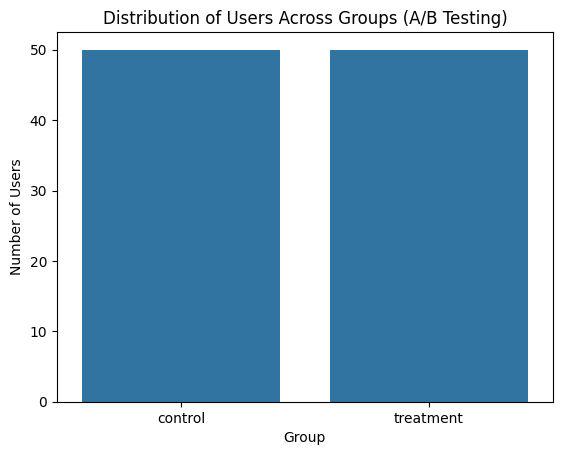

In [ ]:
#Graph
sns.countplot(x='group', data=abtest)
plt.title('Distribution of Users Across Groups (A/B Testing)')
plt.xlabel('Group')
plt.ylabel('Number of Users')
plt.show()


* There are two groups in the data which are control and treatment.
* Both groups has 50 number of users.

### Landing pages

In [ ]:
abtest['landing_page'].value_counts()

,count
landing_page,
old,50
new,50


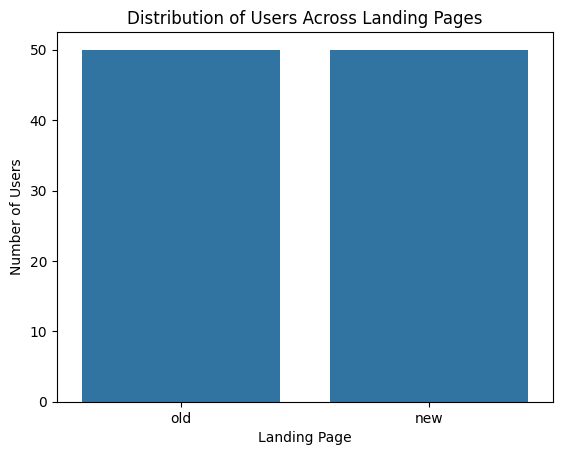

In [ ]:
sns.countplot(x='landing_page', data=abtest)
plt.title('Distribution of Users Across Landing Pages')
plt.xlabel('Landing Page')
plt.ylabel('Number of Users')
plt.show()


* There are two landing pages in the data - old and new
* Both landing pages has 50 numbers of data.

### Time Spent on the Pages

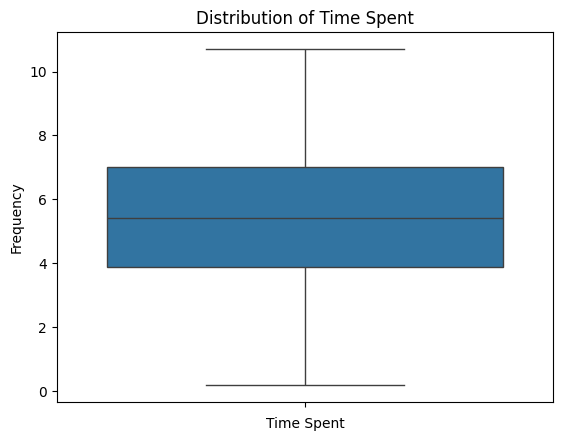

In [ ]:
sns.boxplot(abtest['time_spent_on_the_page'])
plt.title('Distribution of Time Spent')
plt.xlabel('Time Spent')
plt.ylabel('Frequency')
plt.show()

* The data is normally distributed on 'Time spent on page'.
* There is outliers in the data.

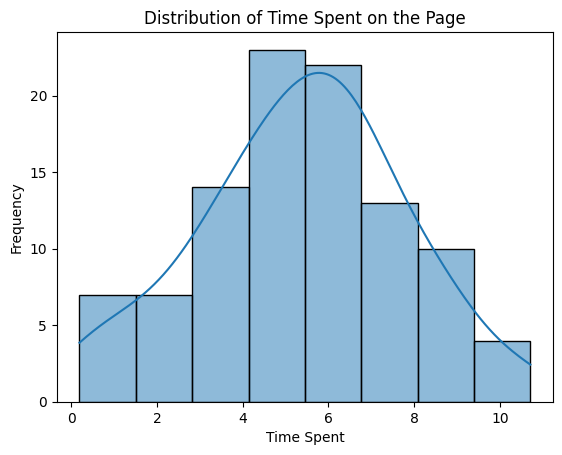

In [ ]:
sns.histplot(abtest['time_spent_on_the_page'], kde=True)  # Using histplot for better distribution visualization
plt.title('Distribution of Time Spent on the Page')
plt.xlabel('Time Spent')
plt.ylabel('Frequency')
plt.show()


* The data is normally distributed over time spent on pages.
* the median time of time spent on pages is about 5 minutes 50 seconds.

### Convertion status

In [ ]:
abtest['converted'].value_counts()

,count
converted,
yes,54
no,46


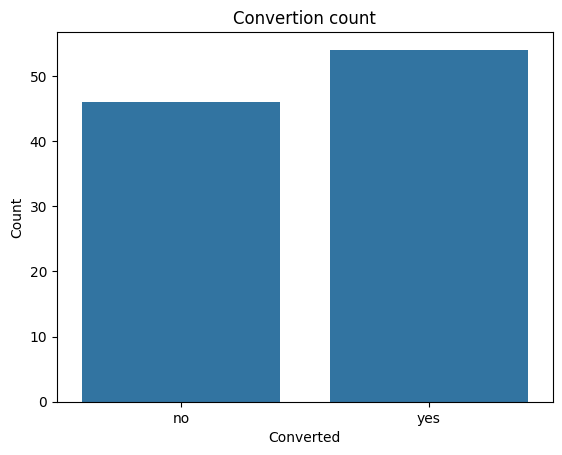

In [ ]:
sns.countplot(x='converted', data=abtest)
plt.title('Convertion count')
plt.xlabel('Converted')
plt.ylabel('Count')
plt.show()


* The  users who visit the landing page( both new and old pages) and get converted is more than who didn't convert.
* There are 54 number of users who were converted and 46 number of users didn't convert.

### Language Preferred

In [ ]:
abtest['language_preferred'].value_counts()

,count
language_preferred,
Spanish,34
French,34
English,32


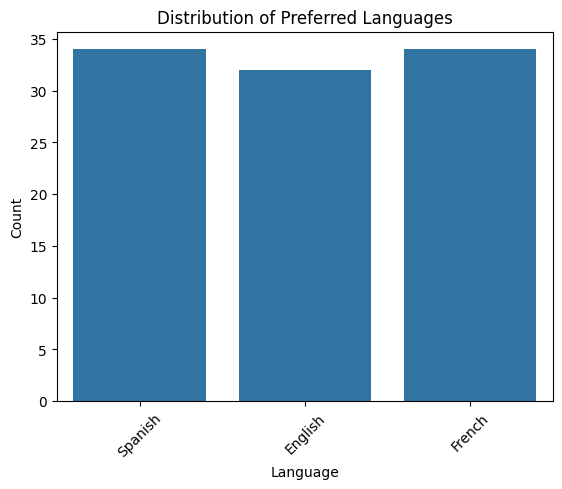

In [ ]:
sns.countplot(x='language_preferred', data=abtest)
plt.title('Distribution of Preferred Languages')
plt.xlabel('Language')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


* Spanish, English and French are the preferred language by users.
* 34 users preferred Spanish, 34 users preferred French and 32 users preferred English language.

### Bivariate Analysis

### Landing page vs	Time spent on the page

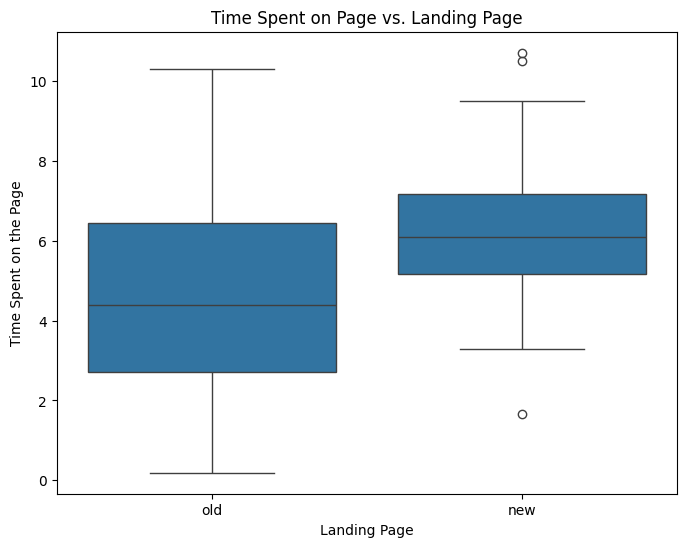

In [ ]:
sns.boxplot(x='landing_page', y='time_spent_on_the_page', data=abtest)
plt.title('Time Spent on Page vs. Landing Page')
plt.xlabel('Landing Page')
plt.ylabel('Time Spent on the Page')
plt.show()

* Median time spent on new pages is higher than median time spent on old pages.
* There are some outliers in time spent on new pages.
* There is more variation in data of time spent on old pages.

### Landing page vs Convertion status

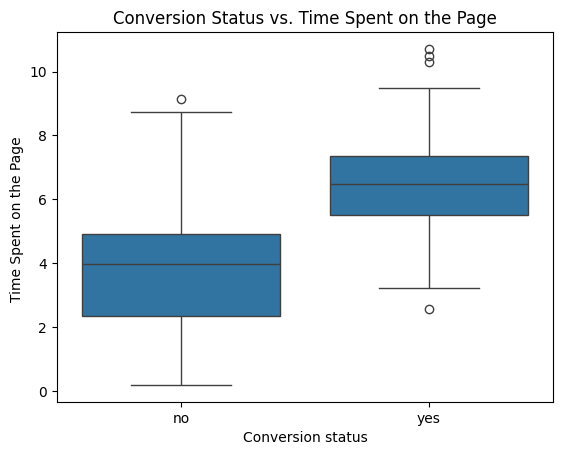

In [ ]:
sns.boxplot(x='converted', y='time_spent_on_the_page', data=abtest)
plt.title('Conversion Status vs. Time Spent on the Page')
plt.xlabel('Conversion status')
plt.ylabel('Time Spent on the Page ')
plt.show()


* The median time spent on the pages and who was converted is much higher than who was not converted which means whoever was converted was spending more time on pages.
* There is some outliers in time spent on pages and who was converted.

### Time Spent vs. Conversion (grouped by Landing Page)

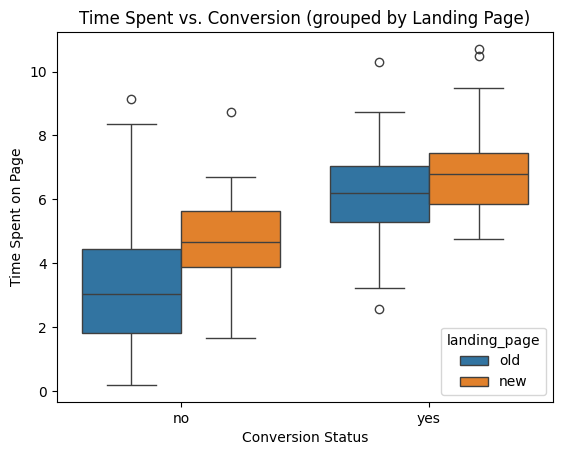

In [ ]:
sns.boxplot(x='converted', y='time_spent_on_the_page', hue='landing_page', data=abtest)
plt.title('Time Spent vs. Conversion (grouped by Landing Page)')
plt.xlabel('Conversion Status')
plt.ylabel('Time Spent on Page')
plt.show()


* The median time spent on new pages is higher on new landing pages.
* The conversion rate is much higher on new landing pages.

### Language preferred vs Time spent on the page

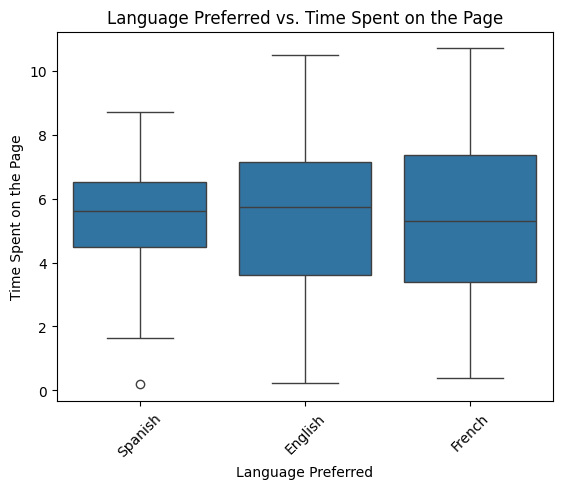

In [ ]:
sns.boxplot(x='language_preferred', y='time_spent_on_the_page', data=abtest)
plt.title('Language Preferred vs. Time Spent on the Page')
plt.xlabel('Language Preferred')
plt.ylabel('Time Spent on the Page')
plt.xticks(rotation=45)
plt.show()


* The median time spent on the page of spanish and English language is about the same.
* The is more variation in time spent on the page of French language.

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Visual Analysis

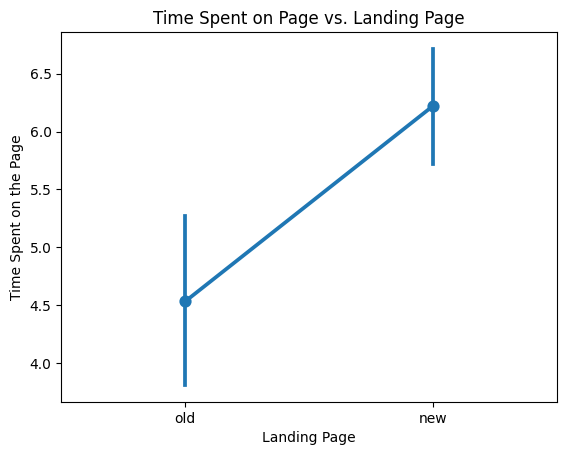

In [ ]:
# time spent and landing pages
sns.pointplot(x='landing_page', y='time_spent_on_the_page', data=abtest)
plt.title('Time Spent on Page vs. Landing Page')
plt.xlabel('Landing Page')
plt.ylabel('Time Spent on the Page')
plt.show()


* Mean time spent on new pages is higher than mean time spent on old pages. We will do statistical test to prove the same.


### Step 1: Define the null and alternate hypotheses

Let  μ1 be the mean time spent on old landing page and                                    
     μ2 be the mean time spent on new landing page.

We will test the null hypothesis

H0: μ1 = μ2

against the alternate hypothesis

Ha: μ1 < μ2

### Step 2: Select Appropriate test

In [ ]:
# find the sample means and sample standard deviations for the two samples
mean_old = abtest[abtest['landing_page'] == 'old']['time_spent_on_the_page'].mean()
std_old = abtest[abtest['landing_page'] == 'old']['time_spent_on_the_page'].std()
mean_new = abtest[abtest['landing_page'] == 'new']['time_spent_on_the_page'].mean()
std_new = abtest[abtest['landing_page'] == 'new']['time_spent_on_the_page'].std()
print('The mean of time spent on old pages is ' + str(round(mean_old,2)))
print('The mean of time spent on new pages is ' + str(round(mean_new,2)))
print('The standard deviation of time spent on old pages is ' + str(round(std_old,2)))
print('The standard deviation of time spent on new pages is ' + str(round(std_new,2)))

The mean of time spent on old pages is 4.53
The mean of time spent on new pages is 6.22
The standard deviation of time spent on old pages is 2.58
The standard deviation of time spent on new pages is 1.82



### Choosing an appropriate test
We don't have population standard deviation and sample standard deviation is not quite equal. To compare mean time spent on old and new pages we can do one tail two sample T test with unequal standard deviation. Now lets check weather the T-test assumption is satisfied or not



* Continuous data - Yes, the usage time is measured on a continuous scale.
* Normally distributed populations - Yes, we are informed that the populations are assumed to be normal.
* Independent populations - As we are taking random samples for two different type of users, the two samples are from two independent populations.
* Unequal population standard deviations - As the sample standard deviations are not equal, the population standard deviations may be assumed to be not equal.
* Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.

### Step 3: Decide the significance level

In th problem statement level of significance α = 0.05

In [ ]:
α = 0.05

### Step 4: Collect and prepare data

In [ ]:
time_spent_on_old= abtest[abtest['landing_page'] == 'old']['time_spent_on_the_page']

time_spent_on_new= abtest[abtest['landing_page'] == 'new']['time_spent_on_the_page']


### Step 5: Calculate the p-value

In [ ]:
#import the required functions
from scipy.stats import ttest_ind

# find the p-value
test_stat, p_value = ttest_ind(time_spent_on_old, time_spent_on_new, equal_var = False, alternative = 'less')
print('The p-value is ' + str(p_value))

The p-value is 0.0001392381225166549


### Step 6: Compare the p-value with $\alpha$

In [ ]:
# print the conclusion based on p-value
if p_value < α:
    print(f'As the p-value {p_value} is less than the level of significance {α}, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance {α}, we fail to reject the null hypothesis.')

As the p-value 0.0001392381225166549 is less than the level of significance 0.05, we reject the null hypothesis.


### Step 7:  Draw inference


As the p-value (~0.0001) is less than the level of significance, we can reject the null hypothesis. Hence, we do have enough evidence to support the claim that the users spend more time on the new landing pages than old existing landing pages.

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

### Visual Analysis

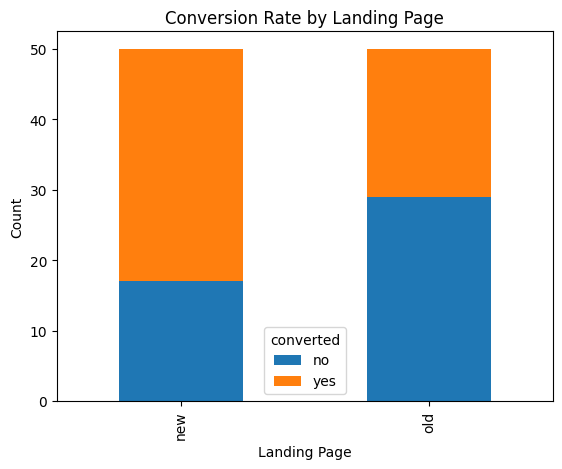

In [ ]:
pd.crosstab(abtest['landing_page'], abtest['converted']).plot(kind='bar', stacked=True)
plt.title('Conversion Rate by Landing Page')
plt.xlabel('Landing Page')
plt.ylabel('Count')
plt.show()

* By looking at the observation, the conversion count is higher on new pages compared to old pages. We will do statistical test to prove that.

### Step 1: Define the null and alternate hypotheses

Let P1 be the proportions of convertion rate of new pages                                                                              
P2 be the proportions of convertion rate of old pages

The manufacturer will test the null hypothesis

>$H_0:p_1 =p_2$

against the alternate hypothesis

>$H_a:p_1 > p_2$

### Step 2: Select Appropriate test

 We are checking if there is a significant difference(greater) between the proportions of two independent groups, so we will perform one tail two sample proportion Z test. For that we will check weather the two proportion Z-test assumption is satisfied or not

*   Binomally distributed population - Yes, a conversion is eather yes or no
*   Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.  
*   Can the binomial distribution approximated to normal distribution -The standard thing is to check whether np and n(1-p) are greater than or equal to 10. Here, n and p refer to the sample size and sample proportion respectively.For that we we find P1, P2 and n
  

In [ ]:
conversion_rate_new = (abtest[(abtest['landing_page'] == 'new') & (abtest['converted'] == 'yes')]).shape[0]
conversion_rate_old = (abtest[(abtest['landing_page'] == 'old') & (abtest['converted'] == 'yes')]).shape[0]
print('The conversion rate of new pages P1 is ' + str(conversion_rate_new))
print('The conversion rate of old pages P2 is ' + str(conversion_rate_old))
print('Total number of observation n1 is ' + str((abtest[abtest['landing_page']=='new']).shape[0]))
print('Total number of observation n2 is ' + str((abtest[abtest['landing_page']=='old']).shape[0]))



The conversion rate of new pages P1 is 33
The conversion rate of old pages P2 is 21
Total number of observation n1 is 50
Total number of observation n2 is 50


Now we can check if np and n(1-p)>=10
>$np_1 = 50\cdot \frac{33}{50} =33 \geq 10\\
n(1-p_1) = 50 \cdot \frac{50-33}{50} =17 \geq 10 \\
np_2 = 50\cdot \frac{21}{50} =21\geq 10\\
n(1-p_2) = 50 \cdot \frac{50-21}{50} =29 \geq 10 $


It is proven that distribution is normal. Now we can perform one tail two proportion Z test


### Step 3: Decide the significance level

In th problem statement level of significance α = 0.05

In [ ]:
α = 0.05

### Step 4: Collect and prepare data

In [ ]:
conversion_rate_new = (abtest[(abtest['landing_page'] == 'new') & (abtest['converted'] == 'yes')]).shape[0]
conversion_rate_old = (abtest[(abtest['landing_page'] == 'old') & (abtest['converted'] == 'yes')]).shape[0]
conversion_rate = np.array([conversion_rate_new, conversion_rate_old])
nobs = np.array([50, 50])
print('Conersion rate:', conversion_rate)
print('Number of observations:', nobs)


Conersion rate: [33 21]
Number of observations: [50 50]


### Step 5: Calculate the p-value

In [ ]:
# find the p-value
from statsmodels.stats.proportion import proportions_ztest
test_stat, p_value = proportions_ztest(conversion_rate, nobs, alternative= 'larger')
print('The p-value is ' + str(p_value))

The p-value is 0.008026308204056278


### Step 6: Compare the p-value with $\alpha$

In [ ]:
# print the conclusion based on p-value
if p_value < α:
    print(f'As the p-value {p_value} is less than the level of significance {α}, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance {α}, we fail to reject the null hypothesis.')

As the p-value 0.008026308204056278 is less than the level of significance 0.05, we reject the null hypothesis.


### Step 7:  Draw inference

As the p-value is less than the significance level 0.05, we can reject the null hypothesis. We have enough evidence to conclude that the conversion rate for the new pages is greater than the conversion rate for the old pages.

## 3. Is the conversion and preferred language are independent or related?

### Visual Analysis

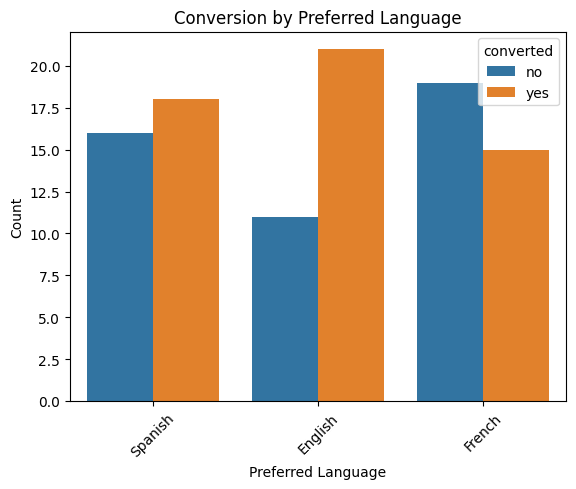

In [ ]:
# visualize the relationship between conversion and preferred language.
sns.countplot(x='language_preferred', hue='converted', data=abtest)
plt.title('Conversion by Preferred Language')
plt.xlabel('Preferred Language')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


* Whose preferred language is English and was converted is much higher than other languages. We will do a statistical test to check whether the preferred language and conversion is related or not.

### Step 1: Define the null and alternate hypotheses

We will test the null hypothesis

>$H_0:$ Conversion and preferred language are independent

against the alternate hypothesis

>$H_a:$ Conversion and preferred language are not independent

### Step 2: Select Appropriate test

To examine whether two categorical variables are independent of each other we will perform Chi-Square Test for Independence. Checking weather the assumptions are satisfied or not
* Categorical variables - Yes
* Expected value of the number of sample observations in each level of the variable is at least 5 - Yes, the number of observations in each level is greater than 5.
* Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.


### Step 3: Decide the significance level

In th problem statement level of significance α = 0.05

In [ ]:
α = 0.05

### Step 4: Collect and prepare data

In [ ]:
# create a contingency table to tabulate the frequencies of the two categorical variables
contingency_table= pd.crosstab(abtest['language_preferred'], abtest['converted'])
contingency_table

converted,no,yes
language_preferred,,
English,11,21
French,19,15
Spanish,16,18


### Step 5: Calculate the p-value

In [ ]:
# import the required function
from scipy.stats import chi2_contingency

# find the p-value
chi, p_value, dof, expected = chi2_contingency(contingency_table)
print('The p-value is', p_value)

The p-value is 0.2129888748754345


### Step 6: Compare the p-value with $\alpha$

In [ ]:
# print the conclusion based on p-value
if p_value < α:
    print(f'As the p-value {p_value} is less than the level of significance {α}, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance {α}, we fail to reject the null hypothesis.')

As the p-value 0.2129888748754345 is greater than the level of significance 0.05, we fail to reject the null hypothesis.


### Step 7:  Draw inference


As the p-value is greater than the significance level, we can not reject the null hypothesis. Hence, we do not have enough statistical significance to conclude that Conversion and preferred language are dependent.

## 4. Is the time spent on the new page same for the different language users?

### Visual Analysis

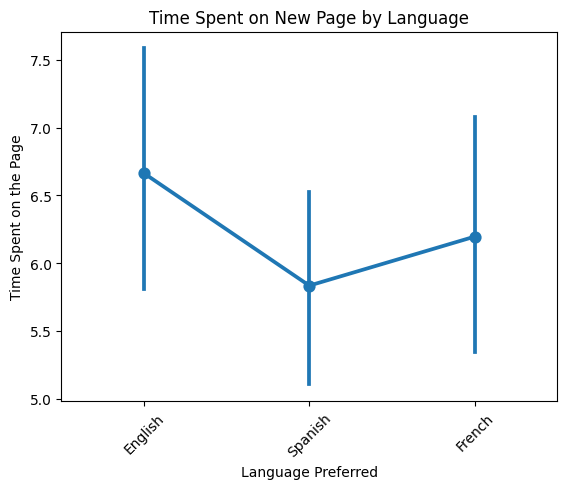

In [ ]:
# Filtering data for the new landing page
new_page_data = abtest[abtest['landing_page'] == 'new']

# Creating a boxplot to visualize time spent by language
sns.pointplot(x='language_preferred', y='time_spent_on_the_page', data=new_page_data)
plt.title('Time Spent on New Page by Language')
plt.xlabel('Language Preferred')
plt.ylabel('Time Spent on the Page')
plt.xticks(rotation=45)
plt.show()


* The mean time spent on the page of spanish and French language is about the same.
* The mean time spent on the page of English language is higher than the rest.
We will do statistical analysis to check whether the mean time is the same among different language user or its different.

### Step 1: Define the null and alternate hypotheses

Let  μ1,μ2,μ3  be the means of time spent on new pages for English, Spanish and French languages respectively.

We will test the null hypothesis

H0:μ1=μ2=μ3

against the alternative hypothesis

Ha:  At least one mean time spent on new pages for English, Spanish and French langauges is different from the rest.

### Step 2: Select Appropriate test

 To determine if there are statistically significant differences between the means of three or more groups we will do ANOVA test. For that we will check for the distribution of normality and check if all the population of variance is equal or not. For that we will do Shapiro-Wilk’s test and Levene’s test.

###### Shapiro-Wilk’s test
We will test the null hypothesis

>$H_0:$ Time spent on new pages follows a normal distribution

against the alternative hypothesis

>$H_a:$ Time spent on new pages does not follow a normal distribution

In [ ]:
# import the required function
from scipy import stats

# find the p-value
w, p_value = stats.shapiro(abtest['time_spent_on_the_page'])
print('The p-value is', p_value)

The p-value is 0.5642956935237358


Since p-value of the test is very large, we fail to reject the null hypothesis that the time spent on new pages follows a normal distribution

### Levene’s test

We will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [ ]:
# Filtering data for the new landing page
new_page_data = abtest[abtest['landing_page'] == 'new']

#import the required function
from scipy.stats import levene

statistic, p_value = levene(
    new_page_data[new_page_data['language_preferred'] == "English"]['time_spent_on_the_page'],
    new_page_data[new_page_data['language_preferred'] == "Spanish"]['time_spent_on_the_page'],
    new_page_data[new_page_data['language_preferred'] == "French"]['time_spent_on_the_page']
)

#find the p-value
print('The p-value is', p_value)

The p-value is 0.46711357711340173


Since the p-value is large, we fail to reject that all the population variances are equal

### Let's test whether the assumptions to do ANOVA test are satisfied or not

* The populations are normally distributed - Yes, the normality assumption is verified using the Shapiro-Wilk’s test.
* Samples are independent simple random samples - Yes, we are informed that the collected sample is a simple random sample.
* Population variances are equal - Yes, the homogeneity of variance assumption is verified using the Levene's test.


### Step 3: Decide the significance level

In th eproblem statement level of significance α = 0.05

In [ ]:
α = 0.05

### Step 4: Collect and prepare data


In [ ]:
english_time_spent= new_page_data[new_page_data['language_preferred'] == "English"]['time_spent_on_the_page']
spanish_time_spent= new_page_data[new_page_data['language_preferred'] == "Spanish"]['time_spent_on_the_page']
french_time_spent= new_page_data[new_page_data['language_preferred'] == "French"]['time_spent_on_the_page']



### Step 5: Calculate the p-value

In [ ]:
#import the required function
from scipy.stats import f_oneway

# perform one-way anova test
test_stat, p_value = f_oneway(english_time_spent, spanish_time_spent,french_time_spent)
print('The p-value is ' + str(p_value))

The p-value is 0.43204138694325955


### Step 6: Compare the p-value with $\alpha$

In [ ]:
# print the conclusion based on p-value
if p_value < α:
    print(f'As the p-value {p_value} is less than the level of significance {α}, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance {α}, we fail to reject the null hypothesis.')

As the p-value 0.43204138694325955 is greater than the level of significance 0.05, we fail to reject the null hypothesis.


### Step 7:  Draw inference

As the p-value is greater than the significance level, we fail to reject the null hypothesis. Hence, we do not have enough statistical significance to conclude that the mean time spent on new pages for English, Spanish and French langauge user is different.

## Conclusion

E-news Express, an online news portal, aims to expand its business by acquiring new subscribers.  The executives at E-news Express are of the opinion that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to decide to subscribe. The data science team used A/B testing to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

1.	Do the users spend more time on the new landing page than on the existing llanding page?
     Yes, we did statistical tests and we do have enough evidence to support the claim that the users spend more time on the new landing pages than old existing landing pages. Also, the mean time spent on old pages is about 4.53 minutes and on new pages is 6.22 minutes.

2.	Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
Yes, we have enough evidence to conclude that the conversion rate for the new pages is greater than the conversion rate for the old pages.

3.	Does the converted status depend on the preferred language?
No, according to our statistical test, conversion and preferred language are not dependent.

4.	Is the time spent on the new page the same for the different language users?
    Yes, the statistical test has proved that the mean time spent on the new page is about same for the English, Spanish, and French language users.


## Business Recommendations


* Declining in new subscribers of the E-news Express news portal is not because
of new content on the website. The new webpage is designed well enough in terms of the outline & recommended content.
* The conversion rate is higher on new landing pages compared to old landing pages.
* The conversion rate is not affected by the preferred language. also the mean time spent on new landing pages is about the same among different language users which means new landing pages have engaging content among different language users.

In summary it is recommended for the company to keep the new landing pages to get more subscribers and keep them engaged.
            




In [ ]:
%shell

In [ ]:
!jupyter nbconvert --to html /ABtesting.ipynb

[NbConvertApp] Converting notebook /ABtesting.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 14 image(s).
[NbConvertApp] Writing 838711 bytes to /ABtesting.html


___